In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
%matplotlib notebook

We got the eigenvalue! $\beta = $ 97.53369140625


<IPython.core.display.Javascript object>


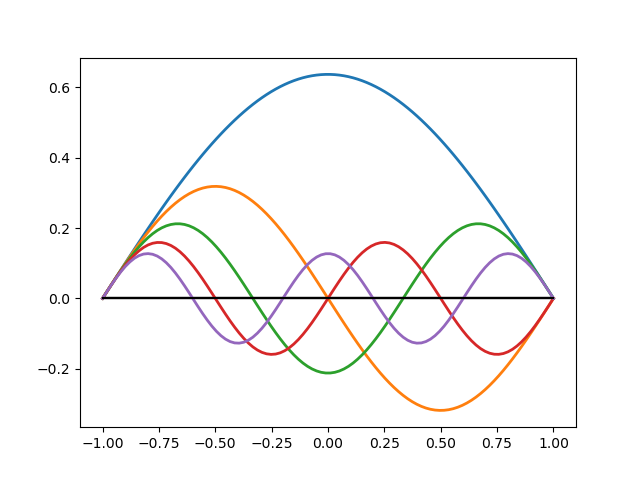

We got the eigenvalue! $\beta = $ 90.13486328125
We got the eigenvalue! $\beta = $ 77.80439453125001
We got the eigenvalue! $\beta = $ 60.54033203125002
We got the eigenvalue! $\beta = $ 38.346582031250016


In [2]:
# Define ODE
def rhsfunc(t, y, n0, beta):
    f1 = y[1]
    f2 = (beta - n0)*y[0]
    return np.array([f1, f2])

# Define some constants
n0 = 100
xp = [-1, 1] # xspan, don't need to define stepsize
tol = 1e-4 # We want to find beta such that |y(x=1)| < tol

# Define our initial conditions
A = 1 # This is the shooting-method parameter that we will change

y0 = np.array([0, A])

beta_start = n0 # This is our initial beta value, we will change it.


# Make a loop over beta values to find more eigenvalue-eigenfunction pairs
for modes in range(5): # Try to find 5 modes
    beta = beta_start 
    dbeta = n0 / 100 # This is the amount we will decrease beta by each time we don't have an eigenvalue
                 # until we get an eigenvalue

    
    for j in range(1000):
        x_evals = np.linspace(-1, 1, 100)
        sol = scipy.integrate.solve_ivp(lambda x,y: rhsfunc(x, y, n0, beta), xp, y0, t_eval = x_evals)
        y_sol = sol.y[0, :]

        if np.abs(y_sol[-1])<tol:
            print(r'We got the eigenvalue! $\beta = $', beta)
            break

        if (-1)**(modes)*y_sol[-1] > 0: 
            beta = beta - dbeta # Decrease beta if y(1)>0, because we know that y(1)>0 for beta = beta_start
        else:
            beta = beta + dbeta/2  # Increase beta by a smaller amount if y(1)<0
            dbeta = dbeta/2 # Cut dbeta in half to make we converge


    beta_start = beta - 0.1 # decrease beta once we have found one mode.

    plt.plot(sol.t, sol.y[0, :], linewidth=2)
    plt.plot(sol.t, 0*sol.t, 'k')

In [24]:
y_sol[-1]

6.282153191311535e-05